# Project Analysis and Visualization

In [58]:
import pandas as pd

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as scp
from   matplotlib  import pyplot   as plt
from   matplotlib  import patches  as pat
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('Output.csv')

In [4]:
data.head()

,Unnamed: 0,price,beds,baths,size,address,city,state,zipcode,region,pricepersqft
0,0,1299000.0,4,3,2688,28 Dunn Avenue,Stamford,CT,6905,east,101.643192
1,1,1599000.0,4,4,6922,679 Hunting Ridge Road,Stamford,CT,6903,east,125.117371
2,2,265000.0,2,1,910,87 Glenbrook Road Unit 5G,Stamford,CT,6906,east,20.735524
3,3,1850000.0,5,4,5587,61 Nathan Hale Drive,Stamford,CT,6902,east,144.757433
4,4,629900.0,3,2,2620,76 Charles Street,Stamford,CT,6902,east,49.287950


In [9]:

df4 = data.drop(columns='Unnamed: 0')

In [11]:
df4.head()

,price,beds,baths,size,address,city,state,zipcode,region,pricepersqft
0,1299000.0,4,3,2688,28 Dunn Avenue,Stamford,CT,6905,east,101.643192
1,1599000.0,4,4,6922,679 Hunting Ridge Road,Stamford,CT,6903,east,125.117371
2,265000.0,2,1,910,87 Glenbrook Road Unit 5G,Stamford,CT,6906,east,20.735524
3,1850000.0,5,4,5587,61 Nathan Hale Drive,Stamford,CT,6902,east,144.757433
4,629900.0,3,2,2620,76 Charles Street,Stamford,CT,6902,east,49.287950


In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1210 non-null   float64
 1   beds          1210 non-null   int64  
 2   baths         1210 non-null   int64  
 3   size          1210 non-null   int64  
 4   address       1210 non-null   object 
 5   city          1210 non-null   object 
 6   state         1210 non-null   object 
 7   zipcode       1210 non-null   int64  
 8   region        1210 non-null   object 
 9   pricepersqft  1210 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 94.7+ KB


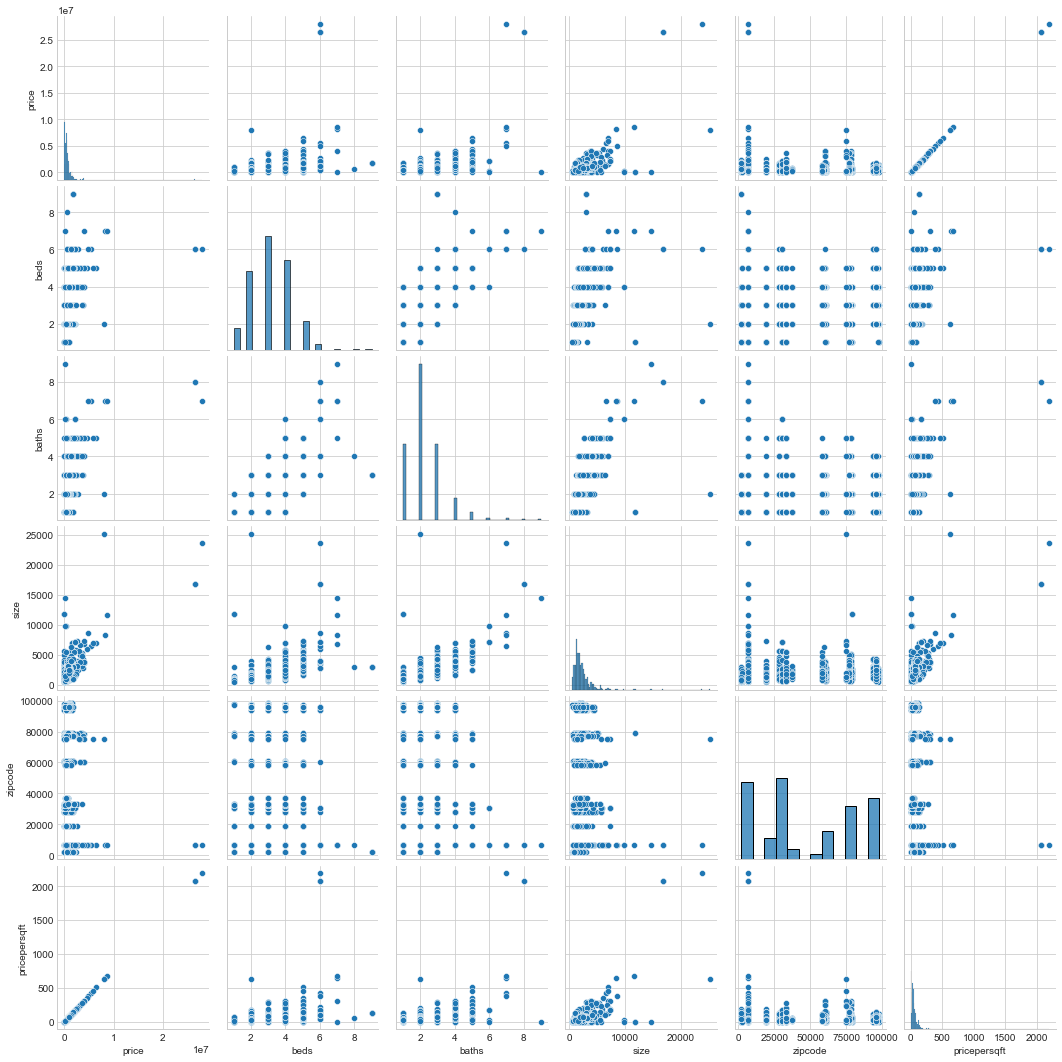

In [13]:
sns.pairplot(df4)

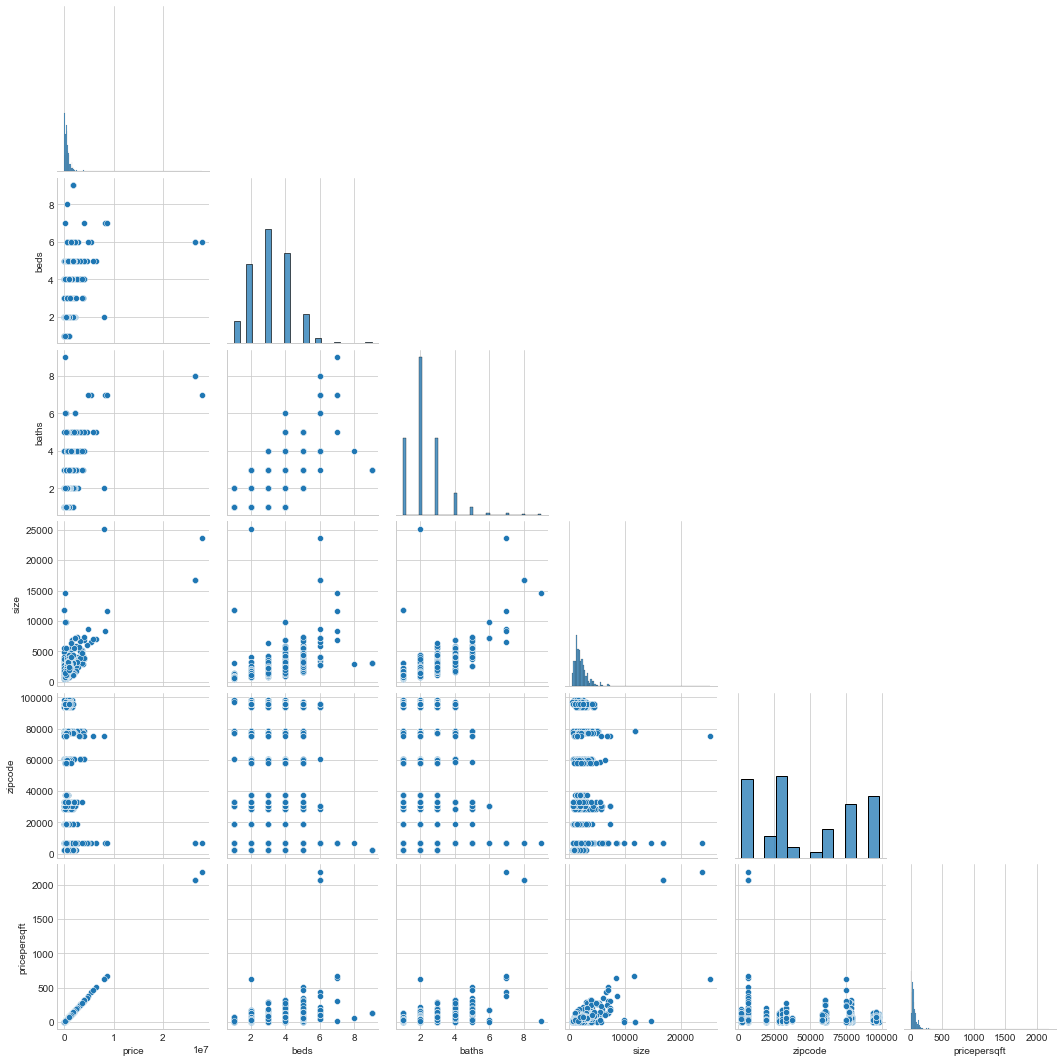

In [14]:
sns.pairplot(df4, corner=True)

# Analysis by State

In [15]:
df4_state = df4.groupby('state')
summarystate = round(df4_state.agg(['count', 'median', 'std']), 3)
summarystate

price                         beds               baths                \
      count    median          std count median    std count median    std   
state                                                                        
CA      150  523200.0   347763.506   150    4.0  1.058   150    2.0  0.797   
CT      187  450000.0  3525330.545   187    3.0  1.459   187    2.0  1.580   
FL      137  349900.0   585129.032   137    3.0  0.996   137    2.0  0.948   
GA       57  468900.0   616353.042    57    3.0  1.408    57    2.0  1.325   
IL       67  699900.0  1096083.971    67    3.0  0.920    67    2.0  0.911   
MA       90  750000.0   613782.240    90    2.0  1.536    90    2.0  0.626   
MT       22  579500.0   236232.367    22    3.0  0.827    22    2.0  0.526   
NC       94  387495.0   419852.344    94    3.0  1.047    94    2.0  0.860   
ND       33  325000.0   292795.173    33    4.0  0.984    33    2.0  0.980   
OR       26  605000.0   250090.786    26    3.0  1.084    26    2.0  0.871   
PA       76  367450.0   475142.087    76    3.0  1.063    76    1.0  0.924   
TN       37  400000.0   117879.892    37    3.0  0.743    37    2.0  0.688   
TX      191  585000.0  1065356.133   191    3.0  0.907   191    2.0  0.931   
WA       43  899000.0   257363.842    43    3.0  0.782    43    2.0  0.593   

       size                   zipcode                    pricepersqft          \
      count  median       std   count   median       std        count  median   
state                                                                           
CA      150  2000.0   942.739     150  93737.0  1052.894          150  40.939   
CT      187  2110.0  2995.261     187   6831.0   166.639          187  35.211   
FL      137  1483.0   882.516     137  32828.0   154.502          137  27.379   
GA       57  1870.0  1572.274      57  30315.0    13.413           57  36.690   
IL       67  2200.0   951.894      67  60619.0    19.232           67  54.765   
MA       90  1260.0   589.798      90   2127.0    14.546           90  58.685   
MT       22  2131.5  1156.771      22  59602.0     0.395           22  45.344   
NC       94  1824.0  1087.135      94  28212.0    29.042           94  30.320   
ND       33  2190.0  1142.340      33  58104.0   198.086           33  25.430   
OR       26  1735.5   664.139      26  97228.0    18.413           26  47.340   
PA       76  1364.0   985.203      76  19128.0    15.063           76  28.752   
TN       37  1683.0   524.782      37  37211.0     5.873           37  31.299   
TX      191  2173.0  2238.582     191  77084.0  1062.771          191  45.775   
WA       43  1640.0   483.774      43  98121.0    22.953           43  70.344   

                
           std  
state           
CA      27.212  
CT     275.847  
FL      45.785  
GA      48.228  
IL      85.766  
MA      48.027  
MT      18.485  
NC      32.852  
ND      22.910  
OR      19.569  
PA      37.179  
TN       9.224  
TX      83.361  
WA      20.138

In [16]:
a = summarystate['price']['count'].sort_values()
b = summarystate['price']['median'].sort_values()
c = summarystate['size']['median'].sort_values()
d = summarystate['pricepersqft']['median'].sort_values()

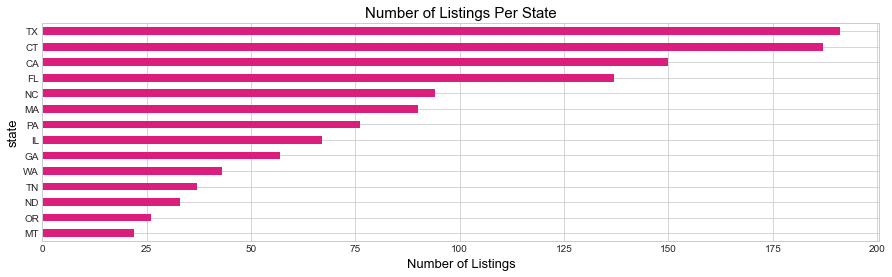

In [17]:
plt.figure(figsize=(15,4))

a.plot.barh(color='#db1e7d')

plt.title('Number of Listings Per State', fontsize=15, color='black')
plt.xlabel('Number of Listings', fontsize=13, color='black')
plt.ylabel('state', fontsize=13, color='black')
plt.show()

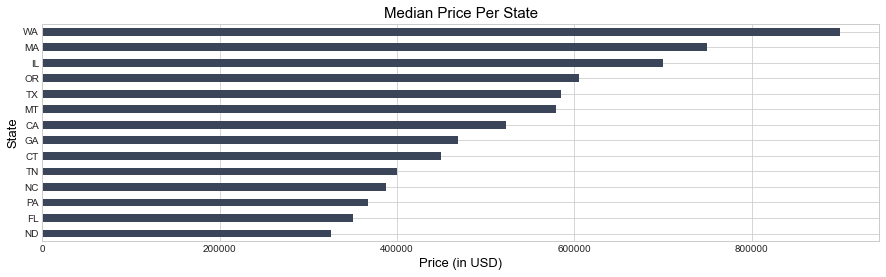

In [18]:
plt.figure(figsize=(15,4))

b.plot.barh(color='#3a4559')

plt.title('Median Price Per State', fontsize=15, color='black')
plt.xlabel('Price (in USD)', fontsize=13, color='black')
plt.ylabel('State', fontsize=13, color='black')
plt.show()

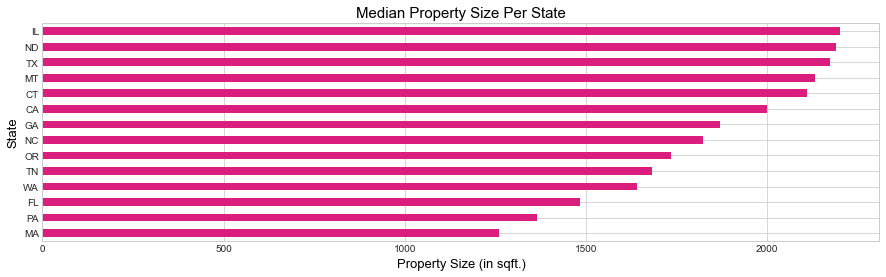

In [19]:
plt.figure(figsize=(15,4))

c.plot.barh(color='#db1e7d')
plt.title('Median Property Size Per State', fontsize=15, color='black')
plt.xlabel('Property Size (in sqft.)', fontsize=13, color='black')
plt.ylabel('State', fontsize=13, color='black')
plt.show()

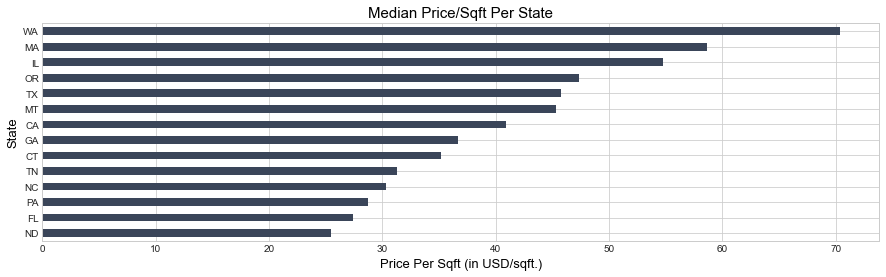

In [20]:
plt.figure(figsize=(15,4))

d.plot.barh(color='#3a4559') 

plt.title('Median Price/Sqft Per State', fontsize=15, color='black')
plt.xlabel('Price Per Sqft (in USD/sqft.)', fontsize=13, color='black')
plt.ylabel('State', fontsize=13, color='black')
plt.show()

## Analysis by City:

In [21]:
df4_city = df4.groupby('city')
summarycity = round(df4_city.agg(['count', 'median', 'std']), 3)
summarycity

price                          beds               baths         \
             count     median          std count median    std count median   
city                                                                          
Atlanta         57   468900.0   616353.042    57    3.0  1.408    57    2.0   
Austin          90   710000.0   871370.177    90    4.0  0.950    90    2.0   
Bismarck        13   379900.0   339130.249    13    3.0  1.032    13    2.0   
Boston          90   750000.0   613782.240    90    2.0  1.536    90    2.0   
Charlotte       94   387495.0   419852.344    94    3.0  1.047    94    2.0   
Chicago         67   699900.0  1096083.971    67    3.0  0.920    67    2.0   
Dallas          13   355000.0  2669133.491    13    3.0  1.256    13    2.0   
Fargo           20   322000.0   264056.384    20    4.0  0.979    20    2.0   
Fresno          81   479000.0   278594.069    81    4.0  0.923    81    2.0   
Greenwich       45  1575000.0  6684926.594    45    4.0  1.745    45    3.0   
Hamden          53   289900.0   127574.737    53    3.0  1.275    53    1.0   
Helena          22   579500.0   236232.367    22    3.0  0.827    22    2.0   
Houston         88   450000.0   700537.789    88    3.0  0.788    88    2.0   
Miami           45   429700.0   576113.336    45    2.0  0.967    45    2.0   
Nashville       37   400000.0   117879.892    37    3.0  0.743    37    2.0   
Orlando         92   349900.0   589515.802    92    3.0  0.944    92    2.0   
Philadelphia    76   367450.0   475142.087    76    3.0  1.063    76    1.0   
Portland        26   605000.0   250090.786    26    3.0  1.084    26    2.0   
Sacramento      69   589000.0   404788.006    69    4.0  1.191    69    3.0   
Seattle         43   899000.0   257363.842    43    3.0  0.782    43    2.0   
Stamford        89   575000.0   555656.083    89    3.0  1.299    89    2.0   

                     size                   zipcode                   \
                std count  median       std   count   median     std   
city                                                                   
Atlanta       1.325    57  1870.0  1572.274      57  30315.0  13.413   
Austin        0.972    90  2164.0  1753.659      90  78737.0  18.358   
Bismarck      1.316    13  2132.0  1331.612      13  58503.0   1.144   
Boston        0.626    90  1260.0   589.798      90   2127.0  14.546   
Charlotte     0.860    94  1824.0  1087.135      94  28212.0  29.042   
Chicago       0.911    67  2200.0   951.894      67  60619.0  19.232   
Dallas        1.441    13  1400.0  6629.038      13  75220.0  11.034   
Fargo         0.686    20  2243.5  1034.333      20  58103.0   0.887   
Fresno        0.685    81  2016.0   816.425      81  93722.0   7.799   
Greenwich     2.288    45  3026.0  4956.479      45   6831.0   0.505   
Hamden        0.724    53  1671.0   687.496      53   6517.0   1.830   
Helena        0.526    22  2131.5  1156.771      22  59602.0   0.395   
Houston       0.758    88  2211.5   986.441      88  77023.0  33.612   
Miami         0.852    45  1285.0   482.298      45  33137.0  19.627   
Nashville     0.688    37  1683.0   524.782      37  37211.0   5.873   
Orlando       0.986    92  1680.0   983.689      92  32822.0  11.830   
Philadelphia  0.924    76  1364.0   985.203      76  19128.0  15.063   
Portland      0.871    26  1735.5   664.139      26  97228.0  18.413   
Sacramento    0.916    69  1698.0  1074.024      69  95828.0   6.723   
Seattle       0.593    43  1640.0   483.774      43  98121.0  22.953   
Stamford      1.039    89  2200.0  1804.141      89   6904.0   1.905   

             pricepersqft                    
                    count   median      std  
city                                         
Atlanta                57   36.690   48.228  
Austin                 90   55.556   68.182  
Bismarck               13   29.726   26.536  
Boston                 90   58.685   48.027  
Charlotte              94   30.320   32.852  
Chicago            

In [22]:
a = summarycity['price']['count'].sort_values()
b = summarycity['price']['median'].sort_values()
c = summarycity['size']['median'].sort_values()
d = summarycity['pricepersqft']['median'].sort_values()

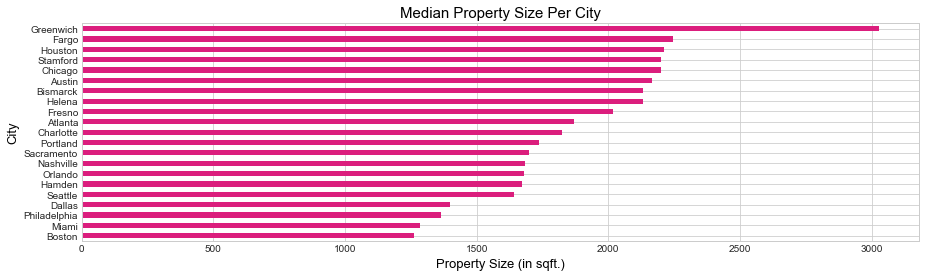

In [24]:
plt.figure(figsize=(15,4))

c.plot.barh(color='#db1e7d')
plt.title('Median Property Size Per City', fontsize=15, color='black')
plt.xlabel('Property Size (in sqft.)', fontsize=13, color='black')
plt.ylabel('City', fontsize=13, color='black')
plt.show()

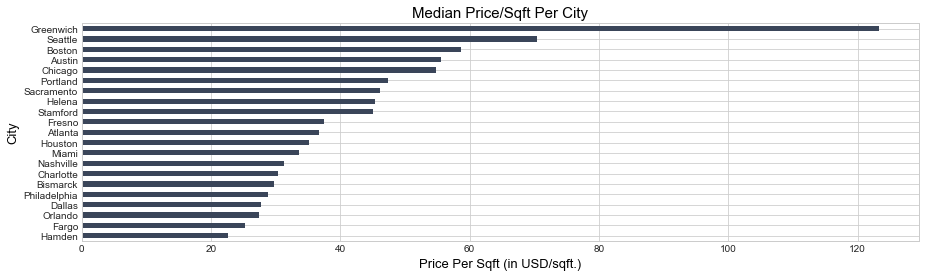

In [25]:
plt.figure(figsize=(15,4))

d.plot.barh(color='#3a4559') 

plt.title('Median Price/Sqft Per City', fontsize=15, color='black')
plt.xlabel('Price Per Sqft (in USD/sqft.)', fontsize=13, color='black')
plt.ylabel('City', fontsize=13, color='black')
plt.show()

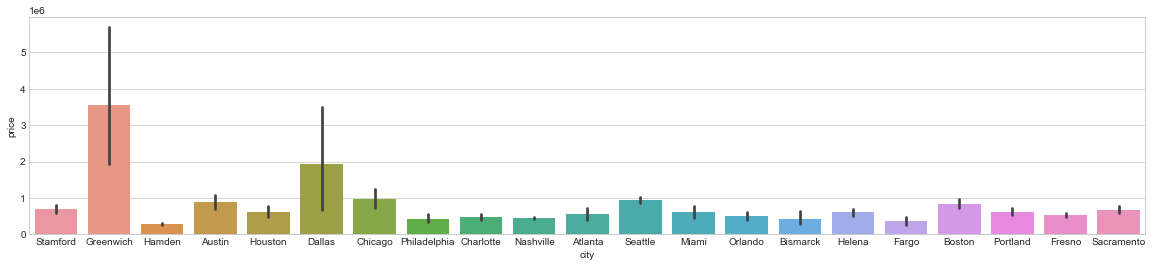

In [32]:
plt.figure(figsize=(20,4))
sns.barplot(x='city', y='price', data=df4)
plt.show()

In [33]:
df4.isnull().sum()

price           0
beds            0
baths           0
size            0
address         0
city            0
state           0
zipcode         0
region          0
pricepersqft    0
dtype: int64

<AxesSubplot:>

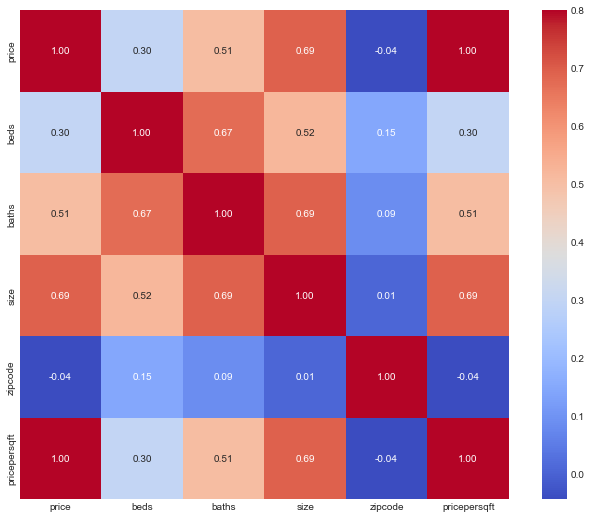

In [34]:
corrmat = df4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap = "coolwarm",annot=True, fmt = ".2f")

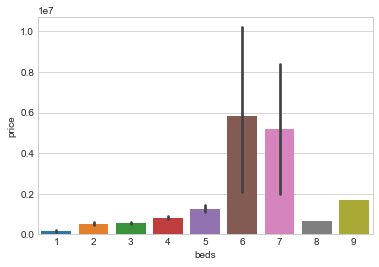

In [35]:
sns.barplot(x='beds', y='price', data=df4)
plt.show()

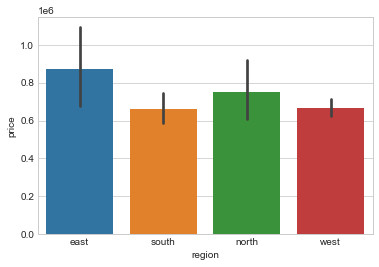

In [37]:
sns.barplot(x='region', y='price', data=df4)
plt.show()

In [38]:
quantitative = [f for f in df4.columns if df4.dtypes[f] != 'object']
quantitative.remove('price')
qualitative = [f for f in df4.columns if df4.dtypes[f] == 'object']

In [39]:
quantitative

['beds', 'baths', 'size', 'zipcode', 'pricepersqft']

In [40]:
qualitative

['address', 'city', 'state', 'region']

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

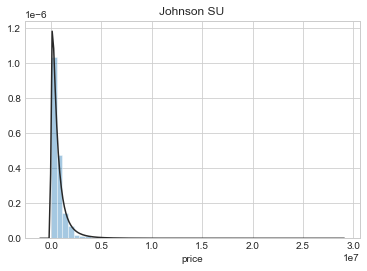

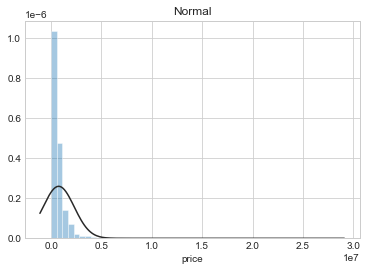

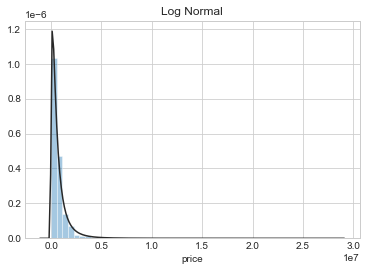

In [46]:
y = df4['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

It is apparent that Price doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

In [47]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df4[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [53]:
X = df4.drop(columns=['price','pricepersqft', 'zipcode'], axis=1)
y = df4['price']

Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. size is main criterion in establishing house price. state has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations.

In [52]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'price']].groupby(feature).mean()['price']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df4, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['address_E', 'city_E', 'state_E', 'region_E']


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   beds       1210 non-null   int64  
 1   baths      1210 non-null   int64  
 2   size       1210 non-null   int64  
 3   address    1210 non-null   object 
 4   city       1210 non-null   object 
 5   state      1210 non-null   object 
 6   region     1210 non-null   object 
 7   address_E  1210 non-null   float64
 8   city_E     1210 non-null   float64
 9   state_E    1210 non-null   float64
 10  region_E   1210 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 104.1+ KB


In [61]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded

In [63]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

<AxesSubplot:>

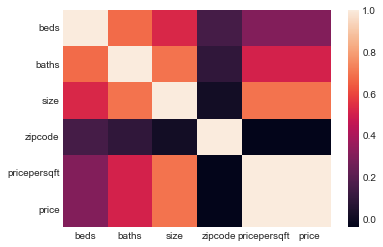

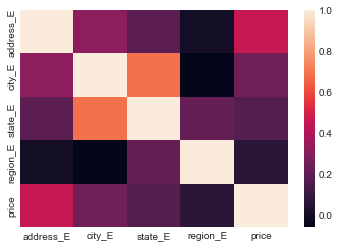

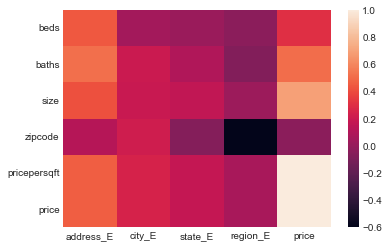

In [67]:
plt.figure(1)
corr = df4[quantitative+['price']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = df4[qual_encoded+['price']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['price'], columns=qual_encoded+['price'])
for q1 in quantitative+['price']:
    for q2 in qual_encoded+['price']:
        corr.loc[q1, q2] = df4[q1].corr(df4[q2])
sns.heatmap(corr)

#### Simple clustering

In [56]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.8100841782440799


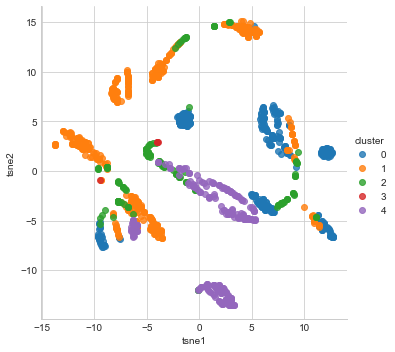

In [80]:
features = quantitative + qual_encoded
model = TSNE(n_components=3, random_state=0, perplexity=50)
X = df4[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=4)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

###  Check most correlated features with the target

In [81]:
top_corr_features = df4.corr()['price'].sort_values(ascending=False)
top_corr_features

price           1.000000
pricepersqft    1.000000
size            0.692102
baths           0.505499
address_E       0.460365
beds            0.301805
city_E          0.243554
state_E         0.171556
region_E        0.060084
zipcode        -0.043278
Name: price, dtype: float64

In [82]:
df4.skew()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


price           12.922644
beds             0.517593
baths            1.455717
size             5.700765
zipcode          0.221498
pricepersqft    12.922644
address_E       -0.136728
city_E          -0.086789
state_E         -0.070320
region_E         0.048331
dtype: float64

### Check the correlation between each feature and the others

array([<AxesSubplot:title={'center':'price'}>,
       <AxesSubplot:title={'center':'beds'}>,
       <AxesSubplot:title={'center':'baths'}>], dtype=object)

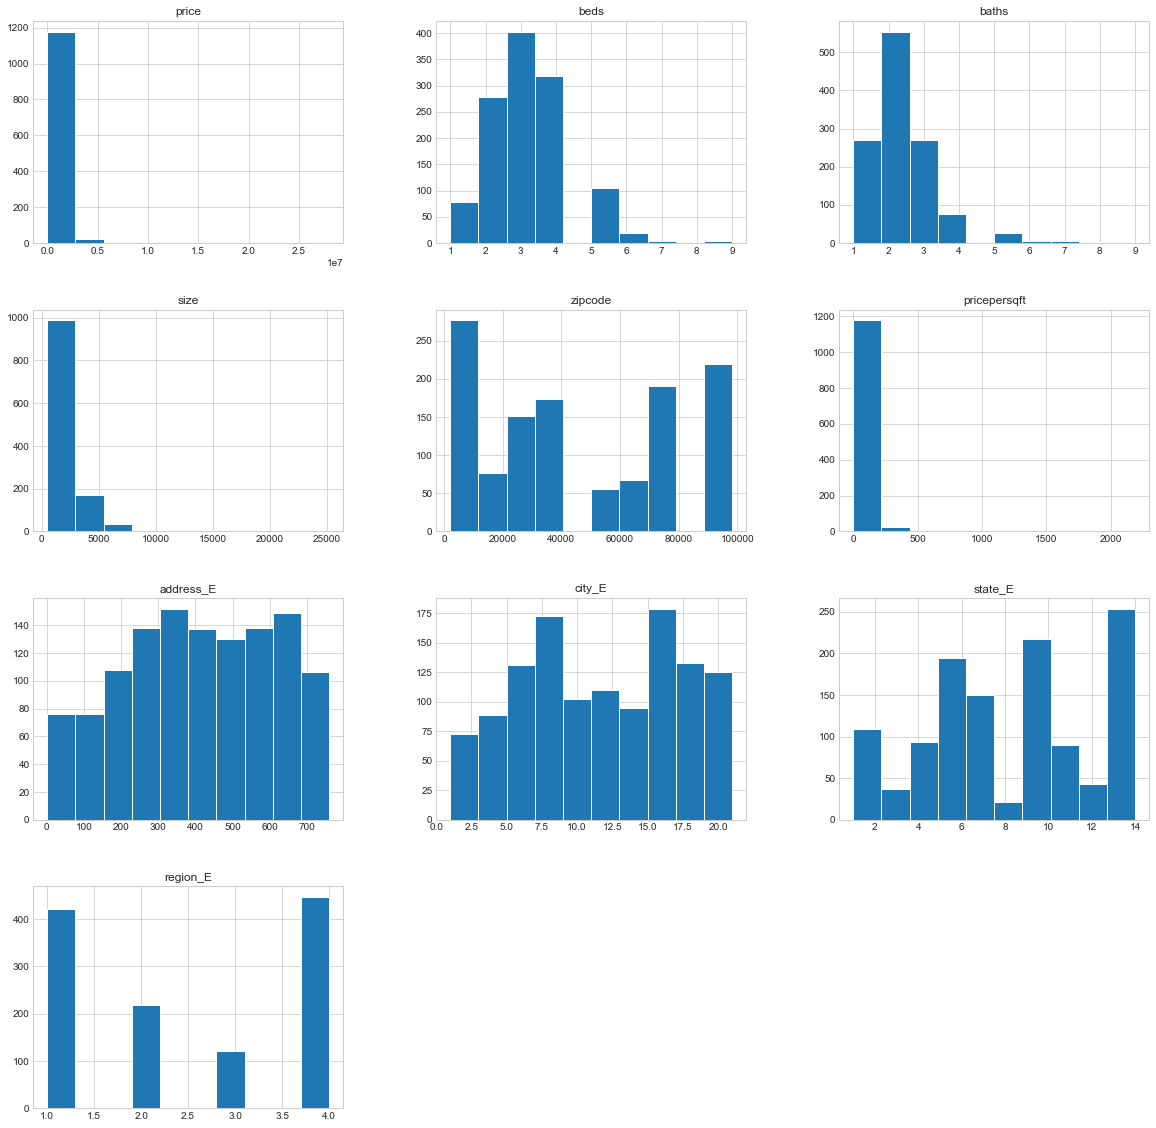

In [83]:
df4.hist(figsize = (20 ,20))[0]

<AxesSubplot:>

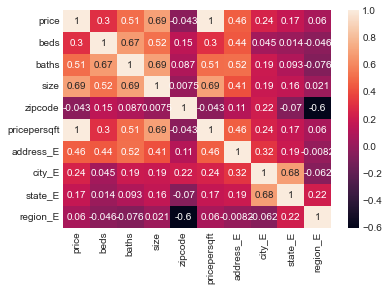

In [85]:
sns.heatmap(df4.corr(), annot=True)